In [1]:
import seaborn as sns

from helpers import *
from alignment import *
from pipeline import *
from visualization import *
from grouping import *
from segmentation import *
from copy import deepcopy

In [18]:
import numpy as np
import matplotlib.pyplot as plt

z = np.random.normal(0,.47, [2,10000])
z1 = np.concatenate([z,z+4], axis=1)
z2 = np.concatenate([z,z+1.9], axis=1)
z3 = np.concatenate([z+2,z+4], axis=1)
# z2 = .9*z1+.5
# z3 = 1.1*z+.2
# z4 = 1.1*z+4

sns.distplot(z1, hist=False, kde_kws={'bw_method':.3})
sns.distplot(z2, hist=False, kde_kws={'bw_method':.3})
sns.distplot(z3, hist=False, kde_kws={'bw_method':.3})
# sns.distplot(z4, hist=False, kde_kws={'bw_method':.3})

C:\Users\Muhammad_Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Muhammad_Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Muhammad_Saeed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

<AxesSubplot:ylabel='Density'>

In [19]:
print(z.shape)
print(z1.shape)
print(z2.shape)
print(z3.shape)
print(z4.shape)

(2, 10000)
(2, 20000)
(2, 20000)
(2, 20000)
(2, 10000)


In [20]:
def plot_pdf(z, shift=0, m =1):
    kde = sns._statistics.KDE(bw_method=.3)
    pd, t = kde(x1=z.flatten())
    plt.plot(t, m*pd+shift, c='b')

In [21]:
plot_pdf(z1[0,:], shift=1)
plot_pdf(z2[0,:], shift=.5)
plot_pdf(z3[0,:], shift=0, m=.5)
# plot_pdf(z4[0,:], shift=-.5, m=.5)



In [22]:
samples = []
for i, zz in enumerate([z1,z2,z3]):
    s = Sample(zz.T,[-1],i,gate_factor_q=.01)
    samples+=[s]
data_handler = DataHandler(samples)

width 0.345 depth 0.9289673187605988 width_cond False
0.005 0.2 0.2
bounds [[-3.6282772325623123, 2.016353892728117], [2.016353892728117, 7.833779848384579]]
tightened_bounds [[-1.0833454790300268, 1.0721614256889525], [2.916654520969973, 5.072161425688953]]
width 0.25 depth 0.5067813201950305 width_cond False
0.005 0.2 0.2
bounds [[-2.7326564299123746, 0.9576405607296379], [0.9576405607296379, 4.838159045734641]]
tightened_bounds [[-1.083367088962759, 0.9085327259365342], [1.0021889033509082, 2.972081394873811]]
width 0.255 depth 0.5581155233405127 width_cond False
0.005 0.2 0.2
bounds [[-0.7732317918801637, 3.0053647978661266], [3.0053647978661266, 6.978734407702431]]
tightened_bounds [[0.9166684009557688, 2.9446271485188396], [3.065290037637694, 5.072165969663963]]
{0: [(Sample_num: 0, Ch: 0, Gate_num: 0 
Gate: [-3.628, 2.016], Segment_min_max: -1.779, 1.985 
Location_group: 0, Morphology_group: 0, Overall_Indx: 0, Aligned_flag: 0)
, (Sample_num: 0, Ch: 0, Gate_num: 1 
Gate: [2.016,

In [23]:
samples.reverse()

In [24]:
plot_channel_segments(0, samples, show_labels=False,limit_x0=-2, limit_x1=6)

In [25]:
Sim_Matrix_dict = {}
agg_models_dict = {}
location_groups_dict = {}
Loc_Ref_Dict_All_Ch = {}
incidence_matrcies = {}
loosened_groups_for_deadlock_dict = {}
jaccard_thresholds = [0.6]*2

In [26]:
recompute_and_update_location_hierarchy_and_refs(
                                channels=[0],
                                jaccard_thresholds=jaccard_thresholds,
                                data_handler=data_handler,
                                Sim_Matrix_dict=Sim_Matrix_dict,
                                agg_models_dict=agg_models_dict,
                                location_groups_dict=location_groups_dict,
                                Loc_Ref_Dict_All_Ch=Loc_Ref_Dict_All_Ch,
                                incidence_matrices= incidence_matrcies,
    loosened_groups_for_deadlock_dict = loosened_groups_for_deadlock_dict
                                   )

data_handler = DataHandler(samples, verbose=False)

ch 0
here
Unique groups [1 2 3] 


optimal gates:
(1, 0, 0.0) [-3.6282772325623123, 2.016353892728117]
(2, 0, 0.0) [2.016353892728117, 7.833779848384579]
(3, 1, 0.0) [0.9576405607296379, 4.838159045734641]

iter 0 [[1, 2], [1, 3], [2, 3]]
[[2. 1. 1.]
 [1. 2. 1.]
 [1. 1. 2.]]

iter 1 [[2, 3]]
[[0. 0. 0.]
 [0. 2. 1.]
 [0. 1. 2.]]
loosened_groups_for_deadlock_dict[0] [1]


In [27]:
plt.figure()
sns.heatmap(1-Sim_Matrix_dict[0], cmap='Blues', annot=False)

<AxesSubplot:>

In [28]:
dendrogram = plot_gates_dendrogram(agg_models_dict[0], ch='', jacc_threshold=.6,show_title=False, gatefontsize=30 ,yfontsize=30)


In [29]:
incidence_matrcies = {}
Loc_Morph_Ref_Dict_All_Ch = {}
Morph_groups_All_ch = {}
Morph_models_dict = {}

In [30]:
update_morphology_hierarchy_and_refs(channels=[0], wass_dist_threshold=[1e-7],data_handler=data_handler,
                                     location_groups_dict=location_groups_dict,
                                     Loc_Morph_Ref_Dict_All_Ch=Loc_Morph_Ref_Dict_All_Ch,
                                     Morph_groups_All_ch = Morph_groups_All_ch,
                                     Morph_models_dict=Morph_models_dict
                                     )


 ********
********
********
********
 ch 0

loc_gr 1  #gates 2 

#members in group 2
loc_gr:1, morph_gr 1
morph_groups [1 1]
indx of gates in morph_group 1: [0 1]

loc_gr 2  #gates 2 

#members in group 2
loc_gr:2, morph_gr 1
morph_groups [1 1]
indx of gates in morph_group 1: [0 1]

loc_gr 3  #gates 2 

#members in group 2
loc_gr:3, morph_gr 1
morph_groups [1 1]
indx of gates in morph_group 1: [0 1]


In [31]:
%matplotlib qt

In [32]:
for m in Morph_models_dict[0]:
    plot_gates_dendrogram(m, ch='', jacc_threshold=.6,show_title=False, gatefontsize=30 ,yfontsize=30)

In [33]:
plt.figure()
plot_gate_as_tiles(data_handler,0,Loc_Ref_Dict_All_Ch=None, rev=1, shift_color =5,color_tiles=False, show_ref=False, tight=True, show_num=True)
plt.axis(False)
plt.figure()
plot_gate_as_tiles(data_handler,0,Loc_Ref_Dict_All_Ch=None, rev=1, shift_color =5,color_tiles=False, show_ref=True,
                   tight=True, show_num=True)
plt.axis(False)
plt.figure()
plot_gate_as_tiles(data_handler,0,Loc_Ref_Dict_All_Ch, rev=1, shift_color =3,color_tiles=True, show_ref=False, tight=True, show_num=True)
plt.axis(False)
plt.figure()
plot_gate_as_tiles(data_handler,0,Loc_Ref_Dict_All_Ch, rev=1, shift_color =3,color_tiles=True, show_ref=True, tight=True, show_num=True)
plt.axis(False)

(-1.391143741894095, 5.3799426225952995, -0.1, 2.1)

In [78]:
plot_network_graph(0, incidence_matrcies[0])

KeyError: 0

In [24]:
samples.reverse()

In [158]:
comp_func_dict={}
funcs_dict = {}
earth_models_dict={}
aligned_samples={}
Ref_Inv_CDF_Dict_All_Ch={}
gates_locations_dict={}
original_samples={}


In [187]:
# comp_func_dict, funcs_dict, earth_models_dict = \
align_samples_func(0,q_alignment=.02,samples=samples, aligned_samples=aligned_samples, original_samples=original_samples,
                   Loc_Ref_Dict_All_Ch=Loc_Ref_Dict_All_Ch, Loc_Morph_Ref_Dict_All_Ch=Loc_Morph_Ref_Dict_All_Ch,
                   Ref_Inv_CDF_Dict_All_Ch=Ref_Inv_CDF_Dict_All_Ch,funcs_dict=funcs_dict,
                                                                comp_func_dict=comp_func_dict,
                   earth_models_dict=earth_models_dict, gates_locations_dict=gates_locations_dict, n_sample=len(samples),
                   sigma = .8, earth_smoothing_penalty=1
                   )

alpha 0.006251108168757291 beta 0.9553688192535859 gamma 0.07773420943223641


C:\Users\Muhammad_Saeed\anaconda3\lib\site-packages\pyearth\earth.py:813: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\Muhammad_Saeed\anaconda3\lib\site-packages\pyearth\earth.py:1066: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


({(0, 0): <function alignment.combine_funcs.<locals>.<lambda>(x)>},
 {(0, 0): [<function alignment.minmaxmean_align.<locals>.<lambda>(x)>]},
 {(0, 0): Earth(max_degree=1, penalty=1, smooth=True)})

In [189]:
aligned_samples

{(0,
  0): array([3.87288921, 4.04053772, 4.33515544, ..., 3.33409753, 3.37758057,
        3.58774573])}

In [42]:
plotted_lr = []
samples_pds = {}
counter = 0
color_by_location = True
for sh, samp in enumerate(samples):
    shift = sh*.47
    gates =[g for g in  samp.gates[0]]
    kde = sns._statistics.KDE(bw_method=.3)
    pd, t = kde(x1=samp(0).flatten())
    samples_pds[sh]= [t, pd]
    for k, gate in enumerate(gates):
        seg = gate.gate
        ind = np.logical_and(t>= seg[0], t<= seg[1])
        tt = t[ind]
        ppd = pd[ind]
        m = 1 if len(gates)>1 else .5
        print(gate.location_group)
        lg = gate.location_group
        gate_num = counter
        counter+=1
        amx = np.argmax(ppd)
        plt.text(tt[amx],m*ppd.min()+shift+.1, f'{gate_num}' ,color='w', fontsize=12)
        col = colors[lg+3] if color_by_location else colors[k+5]
        if lg not in plotted_lr:
            plt.fill_between(tt, m*ppd+shift, shift, color = col, label=f'Location Group: {len(plotted_lr)}')
            plotted_lr+=[lg]
        else:
            plt.fill_between(tt, m*ppd+shift,shift, color = col)

plt.axis(False)
if color_by_location:
    plt.legend(loc='upper left')

3
2
1
3
1
2


In [35]:
from skimage.segmentation import watershed

In [27]:
print(colors)

['blue', 'orange', 'g', 'r', 'coral', 'cyan', 'm', 'steelblue', 'brown', 'y', 'gray', 'k']


In [36]:
fill_colors = ['slateblue', 'lightskyblue','cyan', 'cornflowerblue']
z = np.random.normal(0,.31, [2,8000])
z = np.concatenate([z,z+1.7, z+4.6, z[:,:500]+8], axis=1)
kde = sns._statistics.KDE(bw_method=.3)
pd, t = kde(x1=z.flatten())

plt.figure()
plt.plot(t, pd)
plt.scatter(z[0,:], np.random.uniform(-.002,.008,z.shape[1]), s=.001,c='b')
plt.scatter(np.random.uniform(-2,9,1000), np.random.uniform(-.002,.008, 1000),c='b', s=.001)
plt.axis(False)
plt.figure()
plt.plot(t, -pd)
plt.axis(False)

pd_s = watershed(-pd)
wl = get_watershed_lines_from_labeled_segs(pd_s, t)
# wl[1] = wl[1]-.02
segs = convert_watershed_lines_to_gate(wl)
print(segs)
inds = [np.argmin(np.abs(t-l)) for l in wl]
wl_ys = -pd[inds][1:-1]
for j, v in enumerate(wl_ys):
    plt.figure()
    plt.axis(False)
    plt.plot(t, -pd)
    plt.axhline(v, )
    for k, seg in enumerate(segs):
        ind = np.logical_and(t>= seg[0], t<= seg[1])
        tt = t[ind]
        ppd = pd[ind]
        fill_curve = deepcopy(-ppd)
        fill_curve[fill_curve<v] = v
        plt.fill_between(tt, -ppd,fill_curve, color = fill_colors[k])
    # if j<len(wl_ys):
    for jj in range(j+1):
        plt.plot([segs[jj][1]]*10,np.linspace(wl_ys[jj],0.01,10), color='k', linestyle ='--')

[[-3.13347925756433, 0.8797637101630338], [0.8797637101630338, 3.2032201651630867], [3.2032201651630867, 6.7940165047086225], [6.7940165047086225, 10.877667243799623]]


In [37]:
markers = ['s','^','o','x']
def plot_segments_pd(t, pd, segs, shift_color=0):
    plt.figure()
    for i, seg in enumerate(segs):
        ind = np.logical_and(t>= seg[0], t<= seg[1])
        tt = t[ind]
        ppd = pd[ind]
        plt.fill_between(tt, ppd, color= fill_colors[i+shift_color], linestyle='-', label =f'Segment {i}')
    plt.legend(loc='upper right')
    plt.axis(False)
    return plt.gca()

In [38]:
plot_segments_pd(t, pd, segs)

<AxesSubplot:>

In [39]:
pd_sa = non_maximum_suppression(pd, pd_s,.1)
pd_sa = merge(pd_sa)
wl_a = get_watershed_lines_from_labeled_segs(pd_sa, t)
segs_a = convert_watershed_lines_to_gate(wl_a)
plot_segments_pd(t,pd, segs_a)

<AxesSubplot:>

width 0.105 depth 0.10515499836463912 width_cond True
width 0.215 depth 0.7838278946862721 width_cond False


<AxesSubplot:>

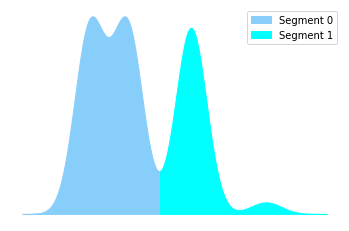

In [32]:
pd_swd = suppress_and_merge_tiny_basins(pd,pd_sa, .2,.2)
wl_wd = get_watershed_lines_from_labeled_segs(pd_swd, t)
segs_wd = convert_watershed_lines_to_gate(wl_wd)
plot_segments_pd(t,pd, segs_wd,shift_color=1)
